In [29]:
import numpy as np
print(np.__version__)

1.14.5


In [30]:
import pandas as pd
print(pd.__version__)

0.22.0


In [31]:
import sklearn
print(sklearn.__version__)

0.19.2


In [32]:
import seaborn
print(seaborn.__version__)

0.7.1


In [64]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [33]:
import keras
print(keras.__version__)

2.1.6


In [36]:
# 加载数据
features = pd.read_csv('titanic_dataset.csv')
y_train = features['Survived']
X_train = features.drop('Survived', axis=1)

# 预览前5条数据
X_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450


In [37]:
print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))

X_train.shape=(1309, 11), y_train.shape=(1309,)


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [39]:
# 缺失值合计
X_train.isnull().sum()

# 待处理的缺失值
# X_train.Age
# X_train.Cabin
# X_train.Embarked
# X_train.Fare

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

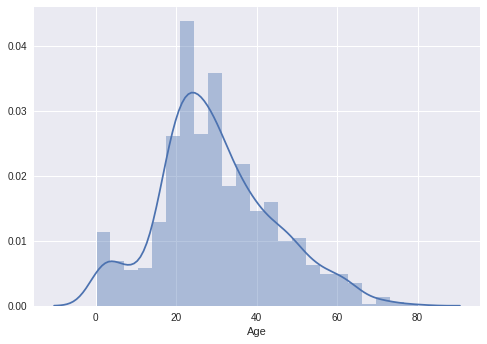

In [40]:
import seaborn as sns

# 先看下数据集的 Age 分布状态
sns.distplot(X_train['Age'].dropna(), hist=True, kde=True)

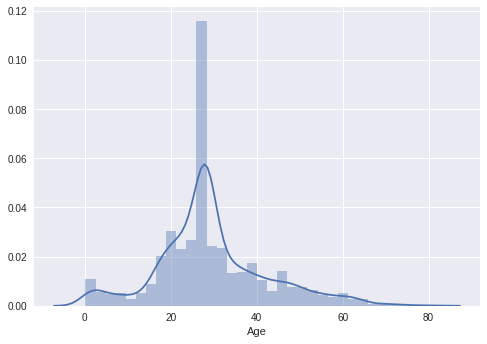

In [41]:
# 将数据集中的NaN数据使用中值填充。
X_train['Age'].replace(np.nan, np.nanmedian(X_train['Age']), inplace=True)

sns.distplot(X_train['Age'], hist=True, kde=True)

In [0]:
# Cabin 的缺失值太多，从 Dataframe 中移除后，也不会影响预测的
X_train.drop("Cabin", axis=1, inplace=True)

In [43]:
# 我们来看下乘客都在哪些站登船的
# S 表示：Southampton，英国南安普敦
# C 表示：Cherbourg-Octeville，法国瑟堡-奥克特维尔
# Q 表示：Queenstown，爱尔兰昆士敦
X_train.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

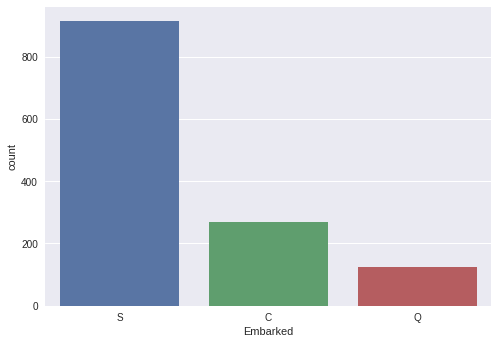

In [44]:
# 登船情况
sns.countplot(x='Embarked', data=X_train)

In [0]:
X_train['Embarked'].replace(np.nan, 'S', inplace=True)

In [46]:
# 数据集有一个缺失数据，我们把它找出来，然后附上中值
X_train[np.isnan(X_train["Fare"])]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
1043,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,3701


In [47]:
# 查询从 英国南安普敦 上传，级别是3的船票价格
pclass3_fares = X_train.query('Pclass == 3 & Embarked == "S"')['Fare']
# 先将空值填充为0
pclass3_fares = pclass3_fares.replace(np.nan, 0)
# 然后取中值
median_fare = np.median(pclass3_fares)

# 最后更新中值到缺失值的那处
X_train.loc[X_train['PassengerId'] == 1044, 'Fare'] = median_fare
# 查看这个为乘客
X_train.loc[X_train['PassengerId'] == 1044]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
1043,60.5,S,8.05,"Storey, Mr. Thomas",0,1044,3,male,0,3701


In [0]:
X_train['Sex'].replace(['male', 'female'], [1,0], inplace=True)

In [49]:
X_train.isnull().sum()

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Ticket         0
dtype: int64

In [50]:
print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))

X_train.shape=(1309, 10), y_train.shape=(1309,)


In [51]:
X_train = pd.get_dummies(X_train)

# 预览 one-hot encoding 前5条数据
X_train.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_W./C. 14258,Ticket_W./C. 14260,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,22.0,7.2500,0,1,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,0,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,3,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,35.0,53.1000,0,4,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,35.0,8.0500,0,5,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))

X_train.shape=(1309, 2246), y_train.shape=(1309,)


In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [54]:
print("train_X.shape={}, train_y.shape={}".format(train_X.shape, train_y.shape))
print("test_X.shape={}, test_y.shape={}".format(test_X.shape, test_y.shape))

train_X.shape=(1047, 2246), train_y.shape=(1047,)
test_X.shape=(262, 2246), test_y.shape=(262,)


In [72]:
# 使用决策树预测模型
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# 创建决策树模型
def createDecisionTreeClassifier():
    model = DecisionTreeClassifier()

    # 训练模型
    model.fit(train_X, train_y)

    # 预测
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)

    # 计算精确度
    train_accuracy = accuracy_score(train_y, train_pred)
    test_accuracy = accuracy_score(test_y, test_pred)

    print('The training accuracy is {}.'.format(train_accuracy))
    print('The test accuracy is {}'.format(test_accuracy))
    
    # ROC curve and AUC
    y_score_dt = model.predict_proba(test_X)
    fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(test_y, y_score_dt[:,1])
    print('Decision Tree Classifier AUC is: {:.3f}'.format(metrics.roc_auc_score(test_y, y_score_dt[:,1])))
    
    return fpr_dt, tpr_dt
fpr_dt, tpr_dt = createDecisionTreeClassifier()

The training accuracy is 1.0.
The test accuracy is 0.854961832061
Decision Tree Classifier AUC is: 0.838


In [73]:
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归预测模型
def createLogisticRegressionModel():
    model = LogisticRegression()
    model.fit(train_X, train_y)

    print('Logistic Regression Accuracy for training data is: {:.3f}'.format(model.score(train_X, train_y)))
    print('Logistic Regression Accuracy for testing data is: {:.3f}'.format(model.score(test_X, test_y)))
    
    y_score_lr = model.decision_function(test_X)
    print('Logistic Regression AUC is: {:.3f}'.format(metrics.roc_auc_score(test_y, y_score_lr)))

    fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(test_y, y_score_lr)
    return fpr_lr, tpr_lr

fpr_lr, tpr_lr = createLogisticRegressionModel()

Logistic Regression Accuracy for training data is: 0.898
Logistic Regression Accuracy for testing data is: 0.863
Logistic Regression AUC is: 0.897


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

def createGradientBoostingClassifierModel():
    model = GradientBoostingClassifier(n_estimators = 500)
    model.fit(train_X, train_y)
    
    # 预测
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)

    print('Gradient Boosting Accuracy for training data is: {:.3f}'.format(accuracy_score(train_y, train_pred)))
    print('Gradient Boosting Accuracy for testing data is: {:.3f}'.format(accuracy_score(test_y, test_pred)))

    # ROC 曲线 和 AUC
    y_score_gb = model.predict_proba(test_X)
    fpr_gb, tpr_gb, thresholds_gb = metrics.roc_curve(test_y, y_score_gb[:,1])
    print('Gradient Boosting Classifier AUC is: {:.3f}'.format(metrics.roc_auc_score(test_y, y_score_gb[:,1])))
    return fpr_gb, tpr_gb
    
fpr_gb, tpr_gb = createGradientBoostingClassifierModel()

Gradient Boosting Accuracy for training data is: 1.000
Gradient Boosting Accuracy for testing data is: 0.859
Gradient Boosting Classifier AUC is: 0.933


In [58]:
from sklearn.neural_network import MLPClassifier

# 创建多层感知器的预测模型
def createMLPClassifierModel():
    model = MLPClassifier(hidden_layer_sizes=128, batch_size=64, max_iter=1000, solver="adam")
    model.fit(train_X, train_y)
     
    # 预测
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    print('Neural Network classifier  Accuracy for training data is: {:.3f}'.format(accuracy_score(train_y, train_pred)))
    print('Neural Network classifier  Accuracy for testing data is: {:.3f}'.format(accuracy_score(test_y, test_pred)))

    # ROC curve and AUC
    y_score_nn = model.predict_proba(test_X)
    fpr_nn, tpr_nn, thresholds_nn = metrics.roc_curve(test_y, y_score_nn[:,1])
    print('Neural Network Classifier AUC is: {:.3f}'.format(metrics.roc_auc_score(test_y, y_score_nn[:,1])))
    return fpr_nn, tpr_nn
  
fpr_nn, tpr_nn = createMLPClassifierModel()

Neural Network classifier  Accuracy for training data is: 0.986
Neural Network classifier  Accuracy for testing data is: 0.748
Neural Network Classifier AUC is: 0.833


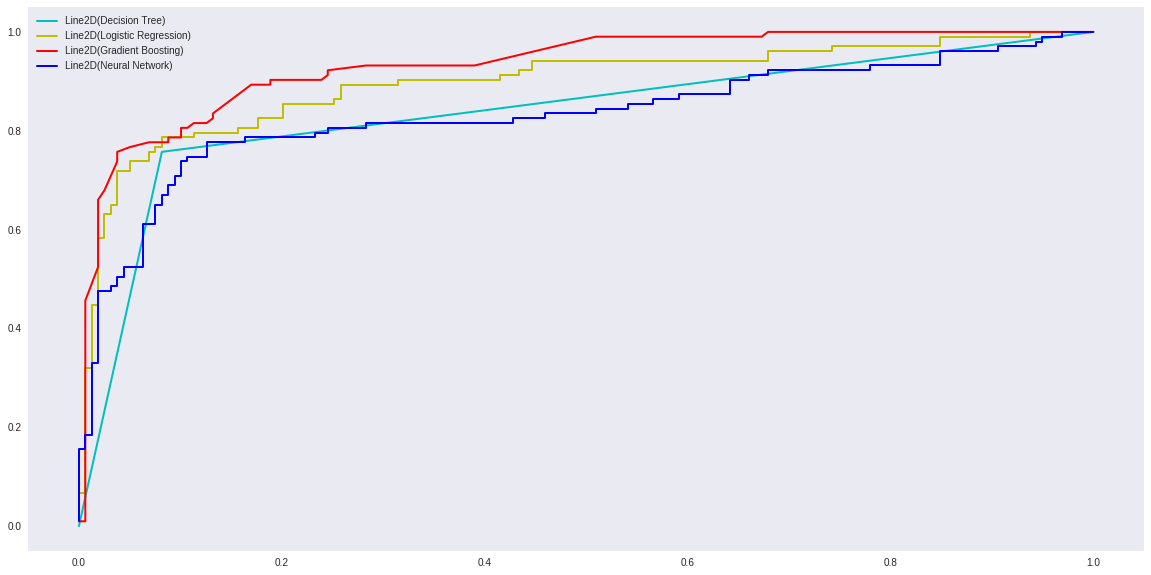

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax1 = ax.plot(fpr_dt, tpr_dt, c='c', lw=2, label="Decision Tree")
ax2 = ax.plot(fpr_lr, tpr_lr, c='y', lw=2, label="Logistic Regression")
ax3 = ax.plot(fpr_gb, tpr_gb, c='r', lw=2, label="Gradient Boosting")
ax4 = ax.plot(fpr_nn, tpr_nn, c='b', lw=2, label="Neural Network")

ax.grid()
lns = ax1 + ax2 + ax3 + ax4
ax.legend(lns, loc=0)
plt.show()

In [125]:
train_X.shape

(1047, 2246)

In [126]:
# Keras的神经网络模型来预测
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import utils as np_utils

def createKerasModel(X, y):
    
    # 创建模型
    model = Sequential()

    # 内核初始化器就使用截断正态分布
    initializers = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
    
    # 输入层维度是 X.shape[1]
    model.add(Dense(input_dim=X.shape[1], units=128, kernel_initializer=initializers, bias_initializer='zeros'))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))

    model.add(Dense(32))
    model.add(Activation("relu"))

    model.add(Dense(2))
    
    # 输出的结果是要么1，要么0，所以使用 sigmoid激活函数
    model.add(Activation("sigmoid"))

    # 编译使用二进制交叉熵，adam优化器自行调整
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 将训练数据的y进行独热编码（one-hot encoding）
    y_train_categorical = np_utils.to_categorical(y)
    
    # 训练模型，epochs表示要训练150次，verbose表示训练每批次时输出日志信息
    model.fit(X.values, y_train_categorical, epochs=150, verbose=1)

    return model
   
keras_model = createKerasModel(train_X, train_y)


Epoch 1/150
1047/1047 [==============================] - 1s 858us/step - loss: 2.7388 - acc: 0.5535
Epoch 2/150
1047/1047 [==============================] - 0s 282us/step - loss: 1.8277 - acc: 0.5965
Epoch 3/150
1047/1047 [==============================] - 0s 281us/step - loss: 1.3957 - acc: 0.5883
Epoch 4/150
1047/1047 [==============================] - 0s 294us/step - loss: 1.1830 - acc: 0.6065
Epoch 5/150
1047/1047 [==============================] - 0s 272us/step - loss: 0.9561 - acc: 0.6237
Epoch 6/150
1047/1047 [==============================] - 0s 211us/step - loss: 0.8876 - acc: 0.6170
Epoch 7/150
1047/1047 [==============================] - 0s 208us/step - loss: 0.8201 - acc: 0.6246
Epoch 8/150
1047/1047 [==============================] - 0s 226us/step - loss: 0.6964 - acc: 0.6485
Epoch 9/150
1047/1047 [==============================] - 0s 221us/step - loss: 0.6520 - acc: 0.6681
Epoch 10/150
1047/1047 [==============================] - 0s 232us/step - loss: 0.6595 - acc: 0.6628

In [129]:
y_test_categorical = np_utils.to_categorical(test_y)
loss_and_accuracy = keras_model.evaluate(test_X.values, y_test_categorical)
print("Loss={}, Accuracy={}.".format(loss_and_accuracy[0], loss_and_accuracy[1]))

262/262 [==============================] - 0s 95us/step
Loss=0.617491665687, Accuracy=0.839694656489.


In [128]:
predictions_classes = keras_model.predict_classes(test_X.values)

submission = pd.DataFrame({
    "PassengerId": test_X["PassengerId"],
    "Survived": predictions_classes})
print(submission[0:15])

      PassengerId  Survived
1148         1149         0
1049         1050         0
982           983         0
808           809         0
1195         1196         1
240           241         1
1118         1119         1
596           597         1
924           925         1
65             66         0
1176         1177         0
1186         1187         0
1057         1058         0
879           880         1
996           997         0
